In [ ]:
# Librerias

import pandas as pd
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, balanced_accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# This we see is other method of imputing values, but give a warning for too much iterations, so we think that the other methods are better
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
##############
# CONSIGNA 3 #
##############

'''Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas,
detallando: características, comportamiento y rango de variación. ¿Qué es cada variable?
Debe incluir (estos ítems no están necesariamente en orden):
-Análisis y decisión sobre datos faltantes.
-Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
-¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
-Codificación de variables categóricas (si se van a utilizar para predicción).
-Matriz de correlación de variables. Estandarización/escalado de datos.
-Validación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y
 prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde lo crean adecuado.'''

Explicacion de cada Variable

Date: es la fecha en la que se registraron todos las variables climaticas.

Location: son las ciudades de Australia en dode se registraron las variables climaticas.

MinTemp: la temperatura minima del dia registrado en Date.

MaxTemp: la temperatura maxima del dia registrado en Date.

Rainfall: cantidad de milimetros de agua caida.

Evaporation: evaporacion del agua.



In [ ]:
# Importamos el csv
weather = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
# Mostramos las columnas del dataset
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#Parte 1

La cantidad de datos que faltan en las columnas es:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


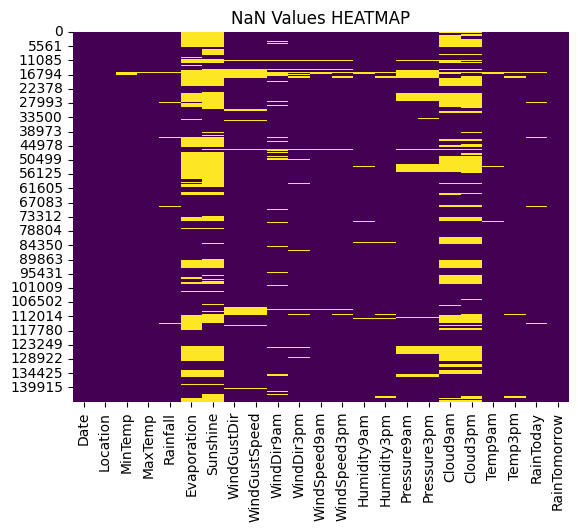

In [ ]:
# Obtenemos con true o false las columnas null y luego las sumamos para saber que cantidad de valores faltantes tenemos por cada columna.
weather_null = weather.isnull().sum()
print('La cantidad de datos que faltan en las columnas es:')
print(weather_null)

# Eliminamos las columnas de la clase donde tengan valos nan ya que estos registros no nos sirven para el entrenamiento del modelo.
# Ya que dicho valor a predecir no existe.
weather_depurado = weather.dropna(subset=['RainTomorrow'])

# Mostramos la cantidad de datos faltantes con un Heatmap, donde cada linea amarilla indica que tiene un nan en ese indice de cregistro.
sns.heatmap(weather_depurado.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values HEATMAP')
plt.show()

# Conclusion: observamos que tenemos una cantidad alta de datos faltantes en la mayoria de las columnas.

Para elegir las ciudades, obtener los valores únicos de la columna Location del DataFrame y ejecutar una línea de código donde se elijan de manera aleatoria 10 ciudades de esos valores. Quedarse con estas ciudades para todo el trabajo práctico.


Conclusion: observamos que tenemos una cantidad alta de datos faltantes en varias columnas, menos en la facha de registro del dato y la localidad donde se registro. Observamos que tenemos varias columnas que son categoricas, por lo tanto primero las transformamos a numericas y luego completamos los faltantes

In [ ]:
# Contamos la cantidad de dias que llovio y los comparamos con lo que no llovio
si_no = weather_depurado['RainTomorrow'].value_counts()
print(f'La cantidad de dias que llovio vs los dias que no de la columna RainTomorrow es :{si_no}')

La cantidad de dias que llovio vs los dias que no de la columna RainTomorrow es :RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


Conclucion: Podemos ver que el Dataset de weatherAUS.csv, una vez ya filtrados todos los valores nan de la columna 'RainTomorrow', vemos que tenemos un gran desvalance entre los dias que no llueven vs los dias que si llueven por lo que cuando entrenemos el modelo con estas cantidades vamos a ver afectado el modelo ya que va a tener muchos mas valores FN y FP ya que esta desbalanceado y va a tender a predecir mas dias que no llovia que dias que si.

Tenemos que realizar un sobmuestreo o un sobremuestreo, para balancar todo el dataset y no tener esa tendencia a que no llovio.

In [ ]:
# Mostramos todas las ciudades de que estas en nuestro dataset que son 49 ciudades de las que tenemos registros.
weather_depurado['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Elejimos 10 ciudades aleatoriamente de 'Location' de las 49 registradas.
citys = weather_depurado['Location'].unique()

# Elejimos 10 numeros al azar para seleccionar las ciudades.
# num = random.sample(range(0, 49), 10)
num = [4,8,45,23,5,17,33,48,28,11]

# Agarramos el primer numero para elegir una ciudad y con ella guardar en la varible 'weather_ten_citys' todos los registros de la primera ciudad.
weather_ten_citys = (weather_depurado[weather_depurado['Location'] == citys[num[0]]])

# Empezamos a iterar todos los numero de eleccion de ciudad y con ellos seleccionamos las ciudades y guardamos todos los regiustros de las 9 ciudades faltantes.
for namber in range(1,10):
  weather_ten_citys = pd.concat([weather_ten_citys, weather_depurado[weather_depurado['Location'] == citys[num[namber]]]], ignore_index=True)

# Dataset con solo 10 ciudades de las 49.
weather_ten_citys

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2009-01-01          Moree     16.4     38.7       0.0         12.2   
1      2009-01-02          Moree     22.3     30.3       0.0         11.2   
2      2009-01-03          Moree     21.2     33.3       0.0          6.2   
3      2009-01-04          Moree     16.4     33.5       0.0         11.2   
4      2009-01-05          Moree     19.2     34.5       0.0         12.6   
...           ...            ...      ...      ...       ...          ...   
28430  2017-06-21  SydneyAirport      8.6     18.6       0.2          2.0   
28431  2017-06-22  SydneyAirport      9.5     17.8       0.2          2.0   
28432  2017-06-23  SydneyAirport      8.7     19.4       0.0          2.4   
28433  2017-06-24  SydneyAirport      9.4     19.9       0.0          1.4   
28434  2017-06-25  SydneyAirport      6.8     19.5       0.0          3.4   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0           9.3          NW           54.0          N  ...        27.0   
1           3.0         NNE           30.0        NNE  ...        68.0   
2          11.7         ENE           46.0        ENE  ...        57.0   
3          13.3         ENE           39.0         NE  ...        51.0   
4          13.4          SE           35.0        ENE  ...        44.0   
...         ...         ...            ...        ...  ...         ...   
28430       7.8         SSW           56.0        NNW  ...        69.0   
28431       9.2          SW           35.0        NNW  ...        74.0   
28432       2.7         NNW           30.0         NW  ...        83.0   
28433       9.3          SW           43.0        WNW  ...        61.0   
28434       9.4         WSW           46.0         NW  ...        67.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             11.0       1005.5       1003.3       6.0       8.0     28.9   
1             40.0       1009.5       1009.0       6.0       7.0     25.2   
2             31.0       1014.9       1012.2       6.0       5.0     24.5   
3             28.0       1016.9       1012.2       1.0       3.0     22.9   
4             22.0       1015.1       1010.6       1.0       6.0     24.2   
...            ...          ...          ...       ...       ...      ...   
28430         67.0       1025.7       1025.3       2.0       2.0     13.3   
28431         70.0       1028.3       1024.6       2.0       2.0     14.3   
28432         57.0       1020.8       1014.7       6.0       6.0     10.9   
28433         41.0       1017.3       1015.2       5.0       2.0     12.9   
28434         42.0       1018.4       1015.2       1.0       1.0     11.9   

       Temp3pm  RainToday  RainTomorrow  
0         37.4         No            No  
1         29.4         No            No  
2         32.7         No            No  
3         31.9         No            No  
4         32.9         No            No  
...        ...        ...           ...  
28430     17.7         No            No  
28431     16.8         No            No  
28432     18.2         No            No  
28433     19.3         No            No  
28434     17.9         No            No  

[28435 rows x 23 columns]

In [ ]:
# Vemos una reduccion de las cantidades y vemos una reduccion del desbalance, auqnue todavia hay una gran brecha algunas varibles.
weather_ten_citys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28435 entries, 0 to 28434
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           28435 non-null  object 
 1   Location       28435 non-null  object 
 2   MinTemp        28068 non-null  float64
 3   MaxTemp        28255 non-null  float64
 4   Rainfall       28134 non-null  float64
 5   Evaporation    16677 non-null  float64
 6   Sunshine       16147 non-null  float64
 7   WindGustDir    25018 non-null  object 
 8   WindGustSpeed  25020 non-null  float64
 9   WindDir9am     25712 non-null  object 
 10  WindDir3pm     26817 non-null  object 
 11  WindSpeed9am   27968 non-null  float64
 12  WindSpeed3pm   27310 non-null  float64
 13  Humidity9am    27773 non-null  float64
 14  Humidity3pm    27224 non-null  float64
 15  Pressure9am    19592 non-null  float64
 16  Pressure3pm    19592 non-null  float64
 17  Cloud9am       20190 non-null  float64
 18  Cloud3

In [ ]:
weather_ten_citys.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  28068.000000  28255.000000  28134.000000  16677.000000  16147.000000   
mean      12.033002     23.881989      2.160795      6.071596      8.072298   
std        6.731874      8.076114      7.965198      4.514066      3.769261   
min       -8.500000     -4.800000      0.000000      0.000000      0.000000   
25%        7.200000     18.600000      0.000000      3.000000      5.600000   
50%       12.000000     23.600000      0.000000      5.200000      9.200000   
75%       17.500000     29.300000      0.400000      8.000000     10.900000   
max       31.900000     47.300000    240.000000     65.400000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   25020.000000  27968.000000  27310.000000  27773.000000  27224.000000   
mean       39.198161     13.347647     16.737129     64.648760     46.605054   
std        13.898143      9.063541      9.072639     22.088035     23.254885   
min         7.000000      0.000000      0.000000      1.000000      1.000000   
25%        30.000000      6.000000      9.000000     51.000000     28.000000   
50%        37.000000     13.000000     15.000000     66.000000     46.000000   
75%        48.000000     19.000000     22.000000     82.000000     62.000000   
max       120.000000    130.000000     83.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  19592.000000  19592.000000  20190.000000  19611.000000  27871.000000   
mean    1017.978971   1015.106615      3.967707      4.170873     17.260105   
std        6.692801      6.701819      2.947146      2.728122      7.063821   
min      985.100000    984.900000      0.000000      0.000000     -7.200000   
25%     1013.400000   1010.500000      1.000000      1.000000     12.400000   
50%     1018.100000   1015.200000      4.000000      4.000000     17.200000   
75%     1022.600000   1019.700000      7.000000      7.000000     22.400000   
max     1038.800000   1037.000000      8.000000      8.000000     39.100000   

            Temp3pm  
count  27313.000000  
mean      22.483089  
std        7.959823  
min       -5.400000  
25%       17.400000  
50%       22.200000  
75%       27.800000  
max       46.700000

In [ ]:
# Creamos las variables dummy para las columnas 'Location', 'RainToday','RainTomorrow'; haciendo asi una codificacion de 1 y 0. Donde 'RainToday' y 'RainTomorrow' si tienen 1 es 'yes' y si es 0 es 'no'.
# Para la columna 'Location' hicimos 10 columnas para cada ciudad con 1 si es esa ciudad y 0 si no lo es.
weather_ten_citys = pd.get_dummies(weather_ten_citys, columns=['Location'],drop_first=True)
weather_ten_citys = pd.get_dummies(weather_ten_citys, columns=['RainToday'],drop_first=True)
weather_ten_citys = pd.get_dummies(weather_ten_citys, columns=['RainTomorrow'])

In [ ]:
# En las columnas 'WindGustDir', 'WindDir9am' y 'WindDir3pm' tenemos los puntos cardinales , donde son 16 en total.
# Estos 16 puntos cardinales los transformamos en sus repectivos grados, para luego aplicarle una transformacion
# llamada sen-cos la cual es muy util para varibles ciclicas como lo son estas. Creando por cada variable 2 columnas,
# una para seno y otra para coseno.
cardinal_to_angle = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5,
}

# Reemplazamops los puntos cardinales por sus respectivos angulos.
weather_ten_citys['WindGustDir'] = weather_ten_citys['WindGustDir'].replace(cardinal_to_angle)
weather_ten_citys['WindDir9am'] = weather_ten_citys['WindDir9am'].replace(cardinal_to_angle)
weather_ten_citys['WindDir3pm'] = weather_ten_citys['WindDir3pm'].replace(cardinal_to_angle)

# Calculamos las coordenadas seno y coseno para la variable 'WindGustDir'.
weather_ten_citys['WindGustDir_Sen'] = np.sin(weather_ten_citys['WindGustDir'])
weather_ten_citys['WindGustDir_Cos'] = np.cos(weather_ten_citys['WindGustDir'])


# Calculamos las coordenadas seno y coseno para la variable 'WindDir9am'.
weather_ten_citys['WindDir9am_Sen'] = np.sin(weather_ten_citys['WindDir9am'])
weather_ten_citys['WindDir9am_Cos'] = np.cos(weather_ten_citys['WindDir9am'])

# Calculamos las coordenadas seno y coseno para la variable 'WindDir3pm'.
weather_ten_citys['WindDir3pm_Sen'] = np.sin(weather_ten_citys['WindDir3pm'])
weather_ten_citys['WindDir3pm_Cos'] = np.cos(weather_ten_citys['WindDir3pm'])

#Eliminamos las varibles 'WindGustDir', 'WindDir9am' y 'WindDir3pm' ya que no van a ser necesarias para el entrenamiento de nuestro modelo.

weather_ten_citys = weather_ten_citys.drop(columns=['WindGustDir'])
weather_ten_citys = weather_ten_citys.drop(columns=['WindDir9am'])
weather_ten_citys = weather_ten_citys.drop(columns=['WindDir3pm'])

<ipython-input-84-ba707fc4ae6e>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_ten_citys['WindGustDir'] = weather_ten_citys['WindGustDir'].replace(cardinal_to_angle)
<ipython-input-84-ba707fc4ae6e>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_ten_citys['WindDir9am'] = weather_ten_citys['WindDir9am'].replace(cardinal_to_angle)
<ipython-input-84-ba707fc4ae6e>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

Conclucion: esta manera de trasformar a estas varibles nos sirven para expresar a la varible como un vector de modulo uno, con dos componenetes; para que cuando entrenemos el modelo tengan el mismo peso cada varible.              

In [ ]:
# Cambiamos el formato de la variable 'Date' a datetime de nuestro dataset para luego poder extraer el mes y el año.
weather_ten_citys['Date'] = pd.to_datetime(weather_ten_citys['Date'], format='%Y-%m-%d')

# Extraemos el mes y el año.
weather_ten_citys['Mes'] = weather_ten_citys['Date'].dt.month
weather_ten_citys['Año'] = weather_ten_citys['Date'].dt.year

#Eliminamos esta variable ya que no nos va a servir para el entrenamiento de nuestro modelo.
weather_ten_citys = weather_ten_citys.drop(columns=['Date'])

Conclucion: No utilizamos el dia para entrenar el modelo, ya que no es significativo esa varible,porque nos podria probocar un sobreajuste cuando el modelo quiera predecir y no nos ayudaria en una generalizacion.

In [ ]:
# Total de columnas a tener para entrenar el modelo
weather_ten_citys.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Location_Brisbane', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Penrith', 'Location_SydneyAirport',
       'Location_Uluru', 'RainToday_Yes', 'RainTomorrow_No',
       'RainTomorrow_Yes', 'WindGustDir_Sen', 'WindGustDir_Cos',
       'WindDir9am_Sen', 'WindDir9am_Cos', 'WindDir3pm_Sen', 'WindDir3pm_Cos',
       'Mes', 'Año'],
      dtype='object')

In [ ]:
# Separamos todas las columnas por un lado sin la clase y por otro lado la clase a predecir.
X = weather_ten_citys.drop('RainTomorrow_Yes', axis=1)
y = weather_ten_citys['RainTomorrow_Yes']

# Dividimos nuestro conjunto de datos en dos partes, la parte de entrenamiento y la parte de prueba.
# La division que hacemos de los datos son de 80/20, donde el 80 es para entrenamiento y el 20 restante para hacer un testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

HISTOGRAM



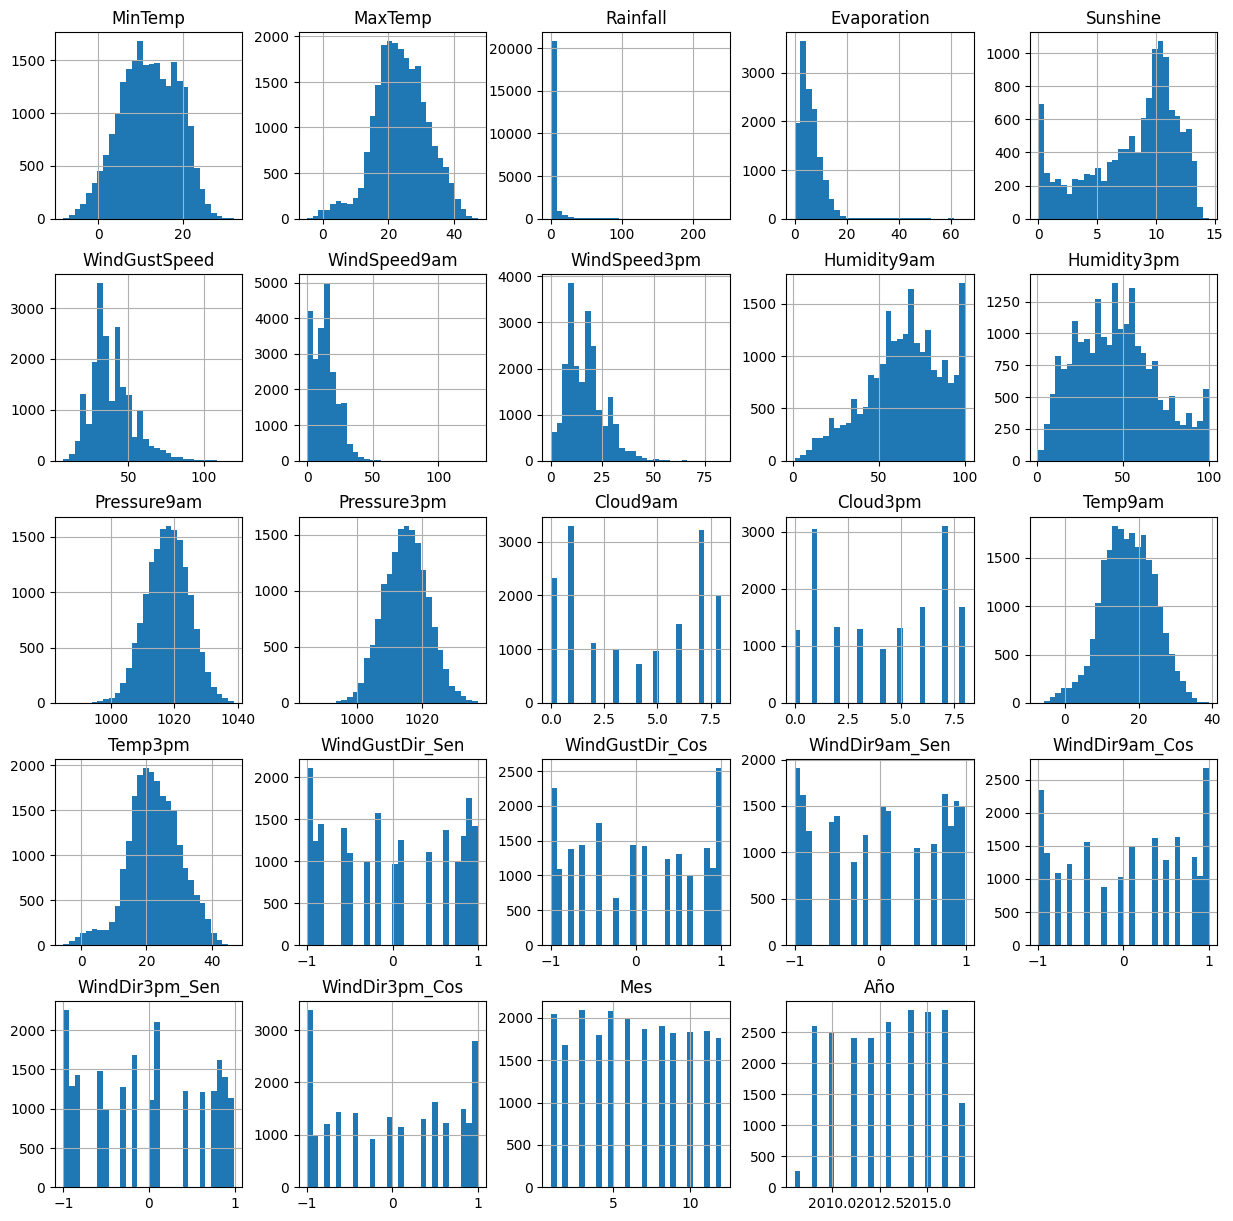

In [ ]:
# Histograma de cada distribucion de las columnas de nuestro dataset, execto la variable a predecir.
print('HISTOGRAM')
print('')
X_train.hist(bins=30, figsize=(15, 15))
plt.show()

Conclucion: podemos observar que muchas de las variables se muestran de manera guasiana como por ejempolo 'MinTemp'. Otras la vemos mas sesgadas hacia uno de los laterales como por ejemplo 'Humidity9am' y las demas son variables categoricas transformadas que no presentan un patron,


PAIRPLOT



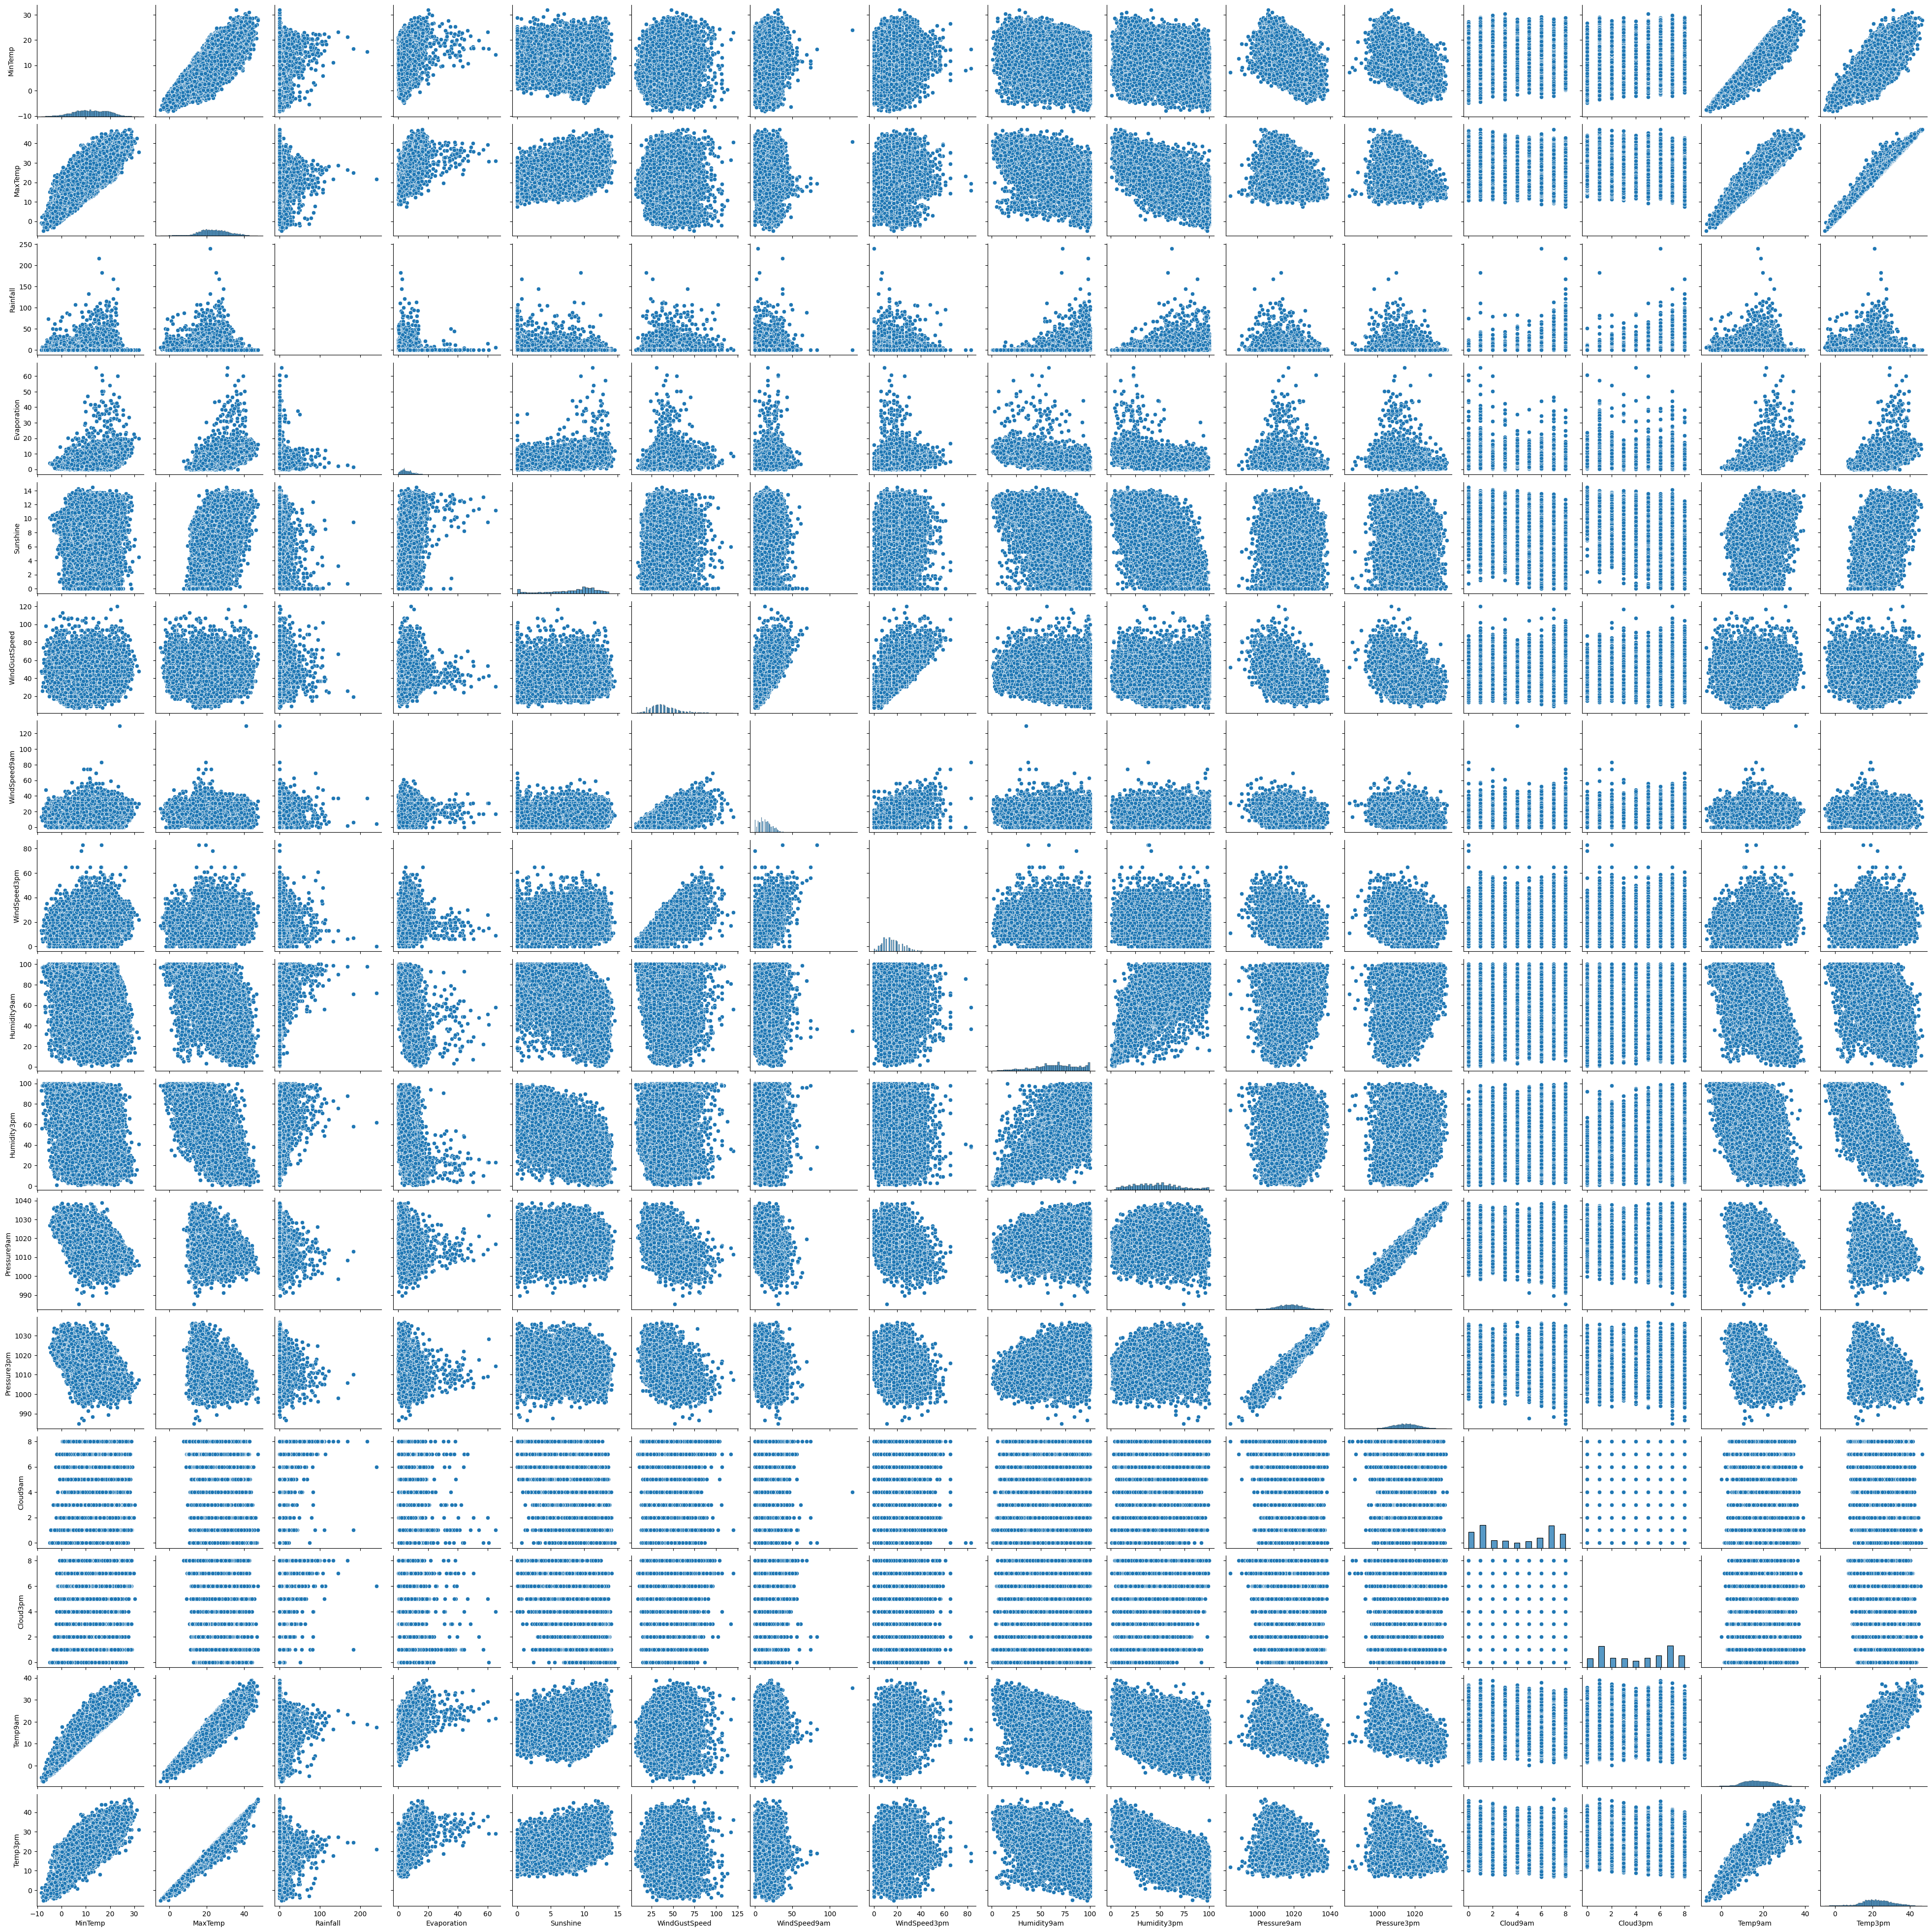

In [ ]:
# Creamos un pairplot para comparar todas las columnas entre si para ver como se relacionan, execto la variable a predecir.
print('')
print('PAIRPLOT')
print('')
# No usamos todas la varibles ya que las varibales tranformadas de las damies y los transformadas de sen-cos no tiene relacion,
# ya que al ser varibles tranformadas no se puede nocion completa de la variable para comparar.
sns.pairplot(X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']])
plt.show()


conclusion: Podemos observar que en la mayoria son nubes de puntos por lo que no tienen una relacion. Exepto algunas como 'Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp' que son lineles, a mediuda que aumenta 1 aumenta la otra. Tambien esta 'Pressure3am' y 'Pressure9am' que ambas entre si son linealmente positivas. Otras de las cosas que vemos son de algunas variables, 'Rainfall' , 'Evaporation', 'WindSpeed9am' y 'WindSpeed3pm' que tienen siempre tendencia a valores mas chicos, concentrando en su totalidad casi en valores mas chicos de dichas varibles y la variable a compararce , a variar en todo su rango.


BOXPLOT



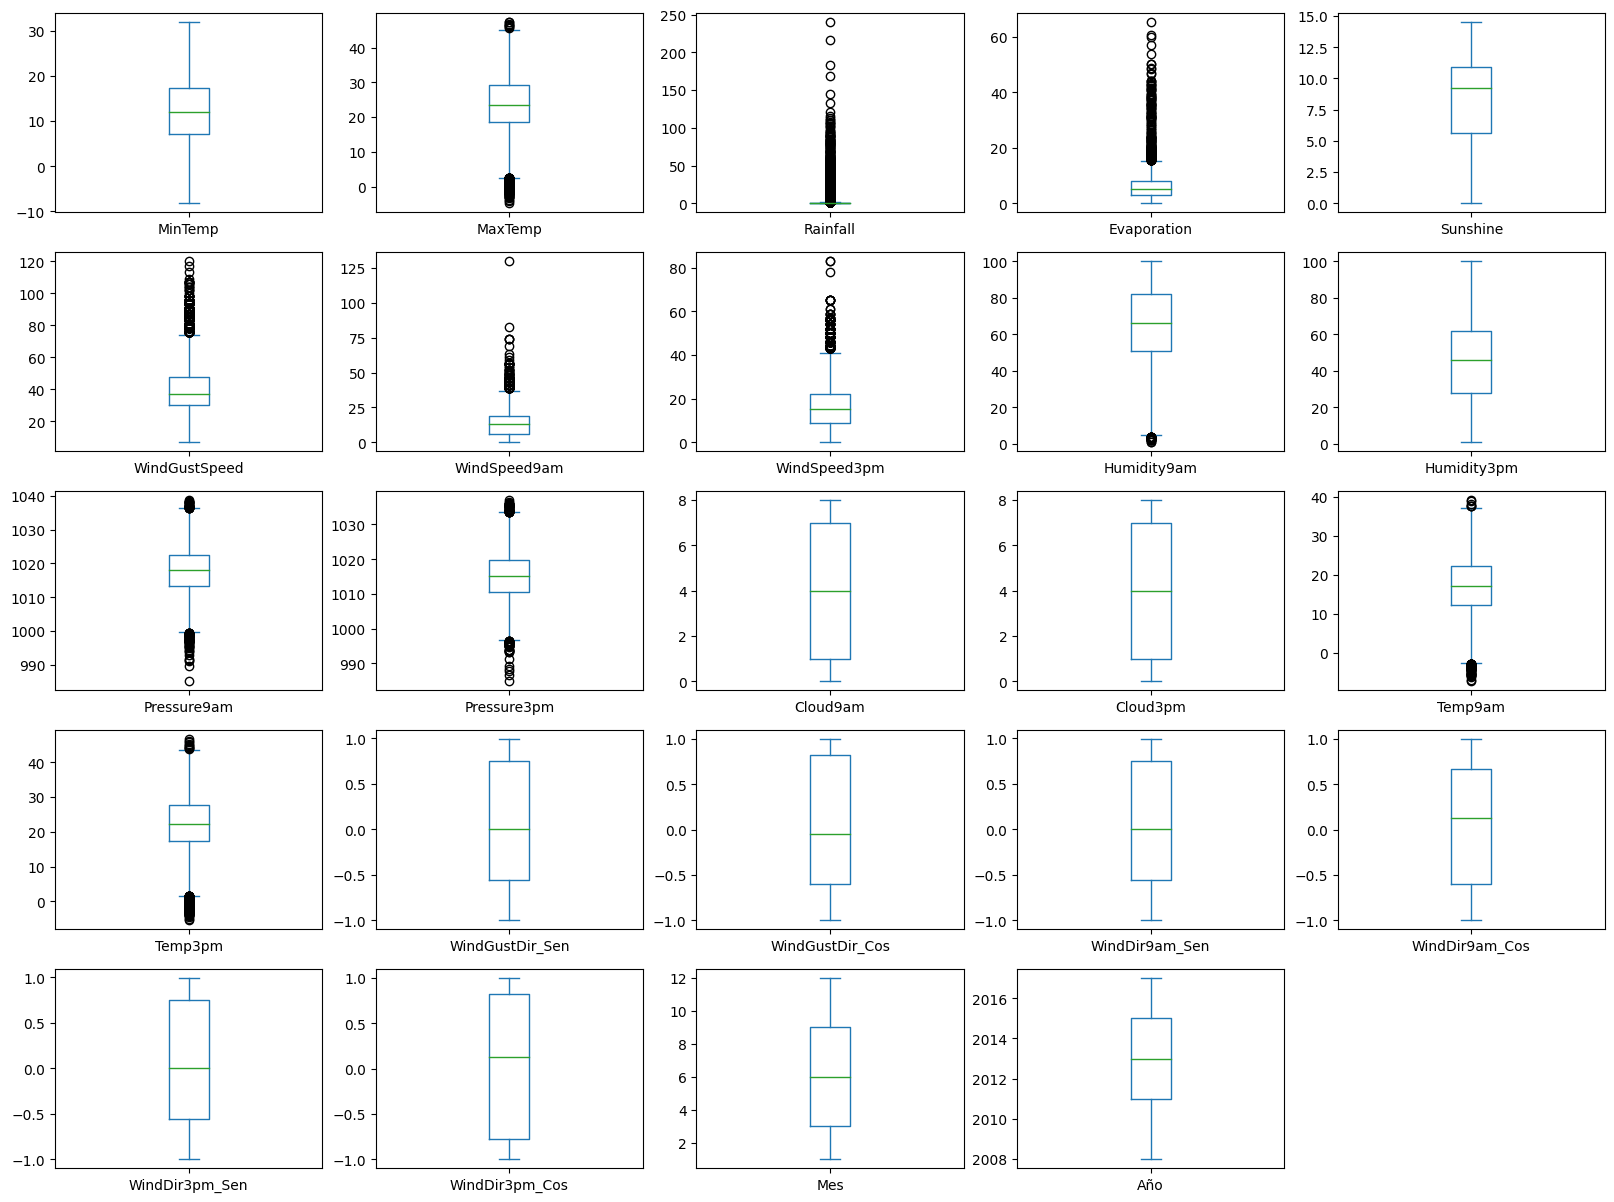

In [ ]:
# Boxplot para todas las varibles menos la variable a predecir.
print('')
print('BOXPLOT')
print('')
X_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 15))
plt.show()

onclucion: Tenemos todos los boxplot y visualizamos que en la  variable 'WindSpeed9am' , 'RainFall' , 'WindSpeed3pam' y 'Evaporation' se podria decir tenemos valores atipicos. En las demas boxplot poodemos ver que aunque se salen de los bigotes de no consideramos que sean valores atipicos sino que que pertenecen al conjunto por la gran cantidad que se visualiza.

No vamos a eliminar los valores atipicos porque pensamos que estos valores no estan en un rango muy sobresaliente de los boxplot, execto en el 'RainFall' q vemos unos 4 valores que podemos considerar atipicos pero esto colleva a la elimicacion del registro completo y preferimos dejarlo y no modificarlo ya que podria ser un caso real.

In [ ]:
def mixed_method(X_train,X_test,col_mean,col_median,col_mode,col_knn):
  # Imputación de valores faltantes, "MÉTODO MIXTO", valores con imputación estadística (SimpleImputer) y KNN en otras variables

  # criterios para remplazar valores faltantes.
  columns_mean = col_mean
  columns_median = col_median
  columns_mode = col_mode
  columns_knn = col_knn

  # craer imputadores
  imputer_mean = SimpleImputer(strategy='mean')
  imputer_median = SimpleImputer(strategy='median')
  imputer_mode = SimpleImputer(strategy='most_frequent')
  imputer_knn = KNNImputer(n_neighbors=5)

  # Creación de ColumnTransformer.
  preprocessor = ColumnTransformer(
      transformers=[
          ('mean', imputer_mean, columns_mean),
          ('median', imputer_median, columns_median),
          ('mode', imputer_mode, columns_mode),
          ('knn', imputer_knn, columns_knn)
      ],
      remainder='passthrough'

  )

  # pipeline creation
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', StandardScaler())
  ])

  # apply of pipeline in train/test
  X_train_scaled = pipeline.fit_transform(X_train)
  X_test_scaled = pipeline.transform(X_test)
  return X_train_scaled , X_test_scaled

In [ ]:
# Tenemos cada columna en cada modo de imputacion de valores faltantes.
# Mediante las graficas que observamos  decidimos elegir un metodo distinto, como la media para las distribuciones mas gausianas,
# los que veiamos que tenian todos los datos concentrados teniendo un muy poequeño rango le aplicamos la moda,
# a los que tenian sesgos hacia algunmos de los lados le aplicamos la mediana
# y por ultimo a todas las demas le aplicamos los k vecinos para que tenga en cuenta sus vecinos para saber que completar.
mean= ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

mode = [ 'Rainfall','Sunshine', 'WindSpeed9am']

median = ['Humidity9am','Humidity3pm', 'Evaporation', 'WindSpeed3pm']

knn = ['Cloud9am', 'Cloud3pm','Location_Brisbane', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Penrith', 'Location_SydneyAirport',
       'Location_Uluru','RainToday_Yes', 'WindGustDir_Sen', 'WindGustDir_Cos',
       'WindDir9am_Sen', 'WindDir9am_Cos', 'WindDir3pm_Sen', 'WindDir3pm_Cos']

X_train_scaled , X_test_scaled = mixed_method(X_train,X_test,mean,median,mode,knn)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

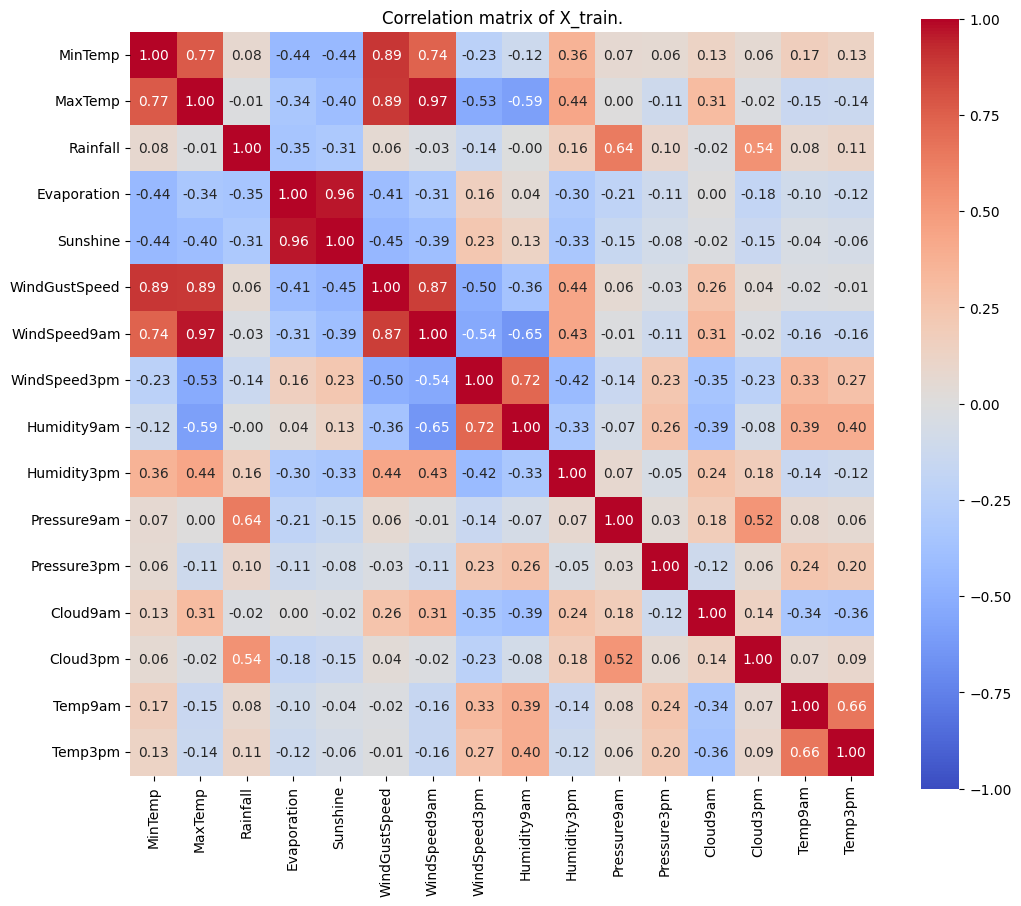

In [ ]:
# Mostramos la relación positiva, negativa o nula entre las columnas de X_train
# No selecionamos todas las columnas porque las dammy no aportaban nada, todas se iban cerca de 0.
corr_train = X_train_scaled[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True,fmt='.2f',annot_kws = {'size':10})
plt.title('Correlation matrix of X_train.')
plt.show()

Conclusion: vemos un analisi parecido al del pairplot.

# Parte 2

In [ ]:
def metricas (y_test, y_pred):
  # Calculamos métricas
  # Esta metrica nos sirve a nosotros ya que queremso saber la vp y los vn, nos
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # 1. Balanced Accuracy
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  # 2. Especificidad (usando el recall_score para la clase negativa)
  # En sklearn, podemos calcular la especificidad como el recall para la clase negativa (días sin lluvia)
  specificity = recall_score(y_test, y_pred, pos_label=0)
  # 3. Matriz de Confusión
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Lluvia", "Lluvia"])
  disp.plot(cmap='Blues')
  plt.title("Matriz de Confusión")
  plt.show()

  # Metricas
  print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
  print(f"Especificidad (Specificity): {specificity:.4f}")
  print(f"Exactitud (Accuracy): {accuracy:.4f}")
  print(f"Precisión (Precision): {precision:.4f}")
  print(f"Sensibilidad (Recall): {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")

  # Imprimir el reporte de clasificación
  print("Reporte de Clasificación:")
  print(classification_report(y_test, y_pred))


In [ ]:
def ROC_AUC(X_test_scaled, y_test):
  y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Para el cálculo de AUC

  # Calculo la ROC y el AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Grafico la curva ROC
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

##Modelo de Regresión Logística binario

In [ ]:
# Inicializamos y entrenamos un modelo de regresión logística. Con el random_state=42 para que seimpre nos devuelva lo mismo.
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Realizamos las predicciones en el conjunto de prueba.
y_pred = model.predict(X_test_scaled)

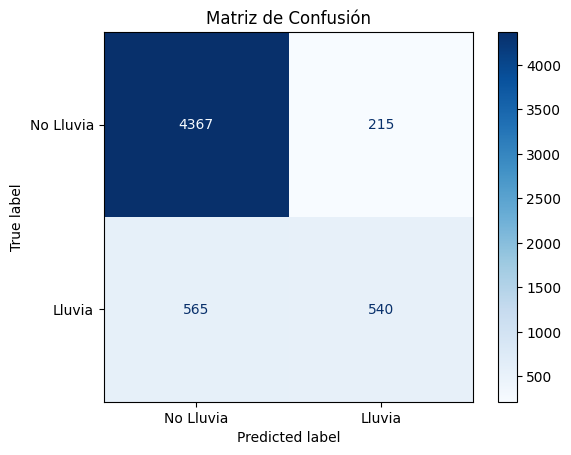

Balanced Accuracy: 0.7209
Especificidad (Specificity): 0.9531
Exactitud (Accuracy): 0.8628
Precisión (Precision): 0.7152
Sensibilidad (Recall): 0.4887
F1 Score: 0.5806
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4582
        True       0.72      0.49      0.58      1105

    accuracy                           0.86      5687
   macro avg       0.80      0.72      0.75      5687
weighted avg       0.85      0.86      0.85      5687



In [ ]:
metricas(y_test, y_pred)

*La Accuracy indica que el modelo acierta en un 86.28% de las predicciones. Esto es bastante bueno, ya que sugiere que la mayoría de las veces, el modelo predice correctamente si lloverá o no. Pero como tenemos un data set desbalanceado , no nos podemos quedar con este resultado solamente.

*La precisión nos indica que la proporción de (No LLuvia) sobre el total de predicciones es de 71.52% significa que, cuando el modelo predice que va a llover, hay una buena probabilidad de que realmente no llueva. Sin embargo.

*El recall mide la capacidad del modelo para identificar correctamente todos los casos positivos. Con un 48.87%, esto sugiere que el modelo no está detectando bien los días de lluvia. Esto es un punto débil, especialmente si queremos minimizar la cantidad de días de lluvia no detectados (falsos negativos).

*El F1 Score tiene un valor de 0.5806 que indica un equilibrio entre precisión y recall. Dado que la sensibilidad es relativamente baja, esto impacta negativamente el F1 Score. Este resultado resalta la dificultad del modelo para captar los casos de lluvia.

*La exactitud balanceada tiene en cuenta el desempeño del modelo en ambas clases, tanto en "lluvia" como en "no lluvia". Un 72.09% indica que el modelo tiene un rendimiento razonable, pero aún puede mejorar en la detección de la clase minoritaria (lluvia).

*La exactitud balanceada tiene un 72.09%  que indica que el modelo tiene un rendimiento razonable, pero aún puede mejorar en la detección de la clase mas chica (lluvia).

*La especificidad mide la capacidad del modelo para identificar correctamente los días en que no lloverá. Un 95.31% es muy alto, lo que significa que el modelo es excelente para predecir los días que no lloveran, pero esto también sugiere que puede estar sesgado hacia la predicción de "no lluvia".

concluciion: como tenemos un modelo que predice mas dias que no llueve q los demas, porque tiene muchas mas valores donde son dias que no llovio.

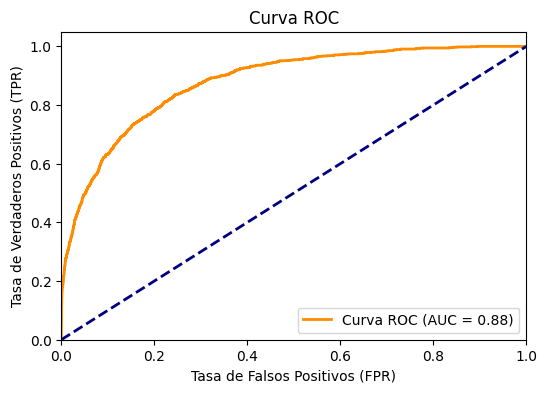

In [ ]:
ROC_AUC(X_test_scaled, y_test)

##Modelo con muestreo balanceado

In [ ]:
# Modelo con muestreo de clase
logistic_class_weight = LogisticRegression(class_weight='balanced')
logistic_class_weight.fit(X_train_scaled, y_train)

# Evaluación
y_pred_balanced= logistic_class_weight.predict(X_test_scaled)

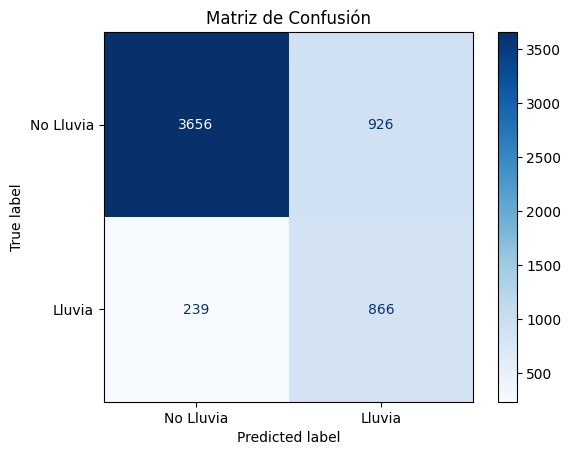

Balanced Accuracy: 0.7908
Especificidad (Specificity): 0.7979
Exactitud (Accuracy): 0.7951
Precisión (Precision): 0.4833
Sensibilidad (Recall): 0.7837
F1 Score: 0.5979
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.94      0.80      0.86      4582
        True       0.48      0.78      0.60      1105

    accuracy                           0.80      5687
   macro avg       0.71      0.79      0.73      5687
weighted avg       0.85      0.80      0.81      5687



In [ ]:
metricas(y_test, y_pred_balanced)

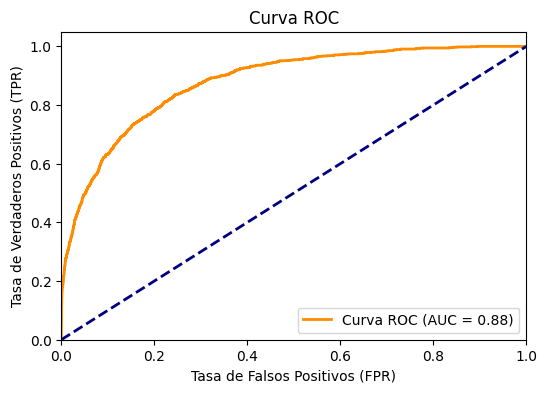

In [ ]:
ROC_AUC(X_test_scaled, y_test)

##Modelo de Regresión Logística con Oversampling

In [ ]:
# Remuestreo con Oversampling (RandomOverSampler)
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_scaled, y_train)
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

# Modelo con muestreo de clase
logistic_class_weight = LogisticRegression(class_weight='balanced')
logistic_class_weight.fit(X_train_scaled, y_train)

# Evaluación
y_pred_over = logistic_class_weight.predict(X_train_scaled)

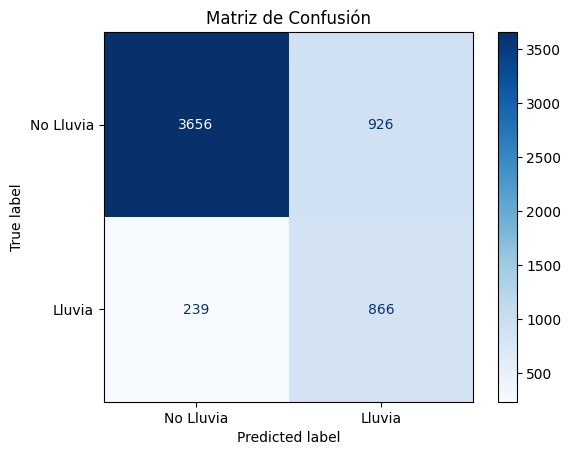

Balanced Accuracy: 0.7908
Especificidad (Specificity): 0.7979
Exactitud (Accuracy): 0.7951
Precisión (Precision): 0.4833
Sensibilidad (Recall): 0.7837
F1 Score: 0.5979
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.94      0.80      0.86      4582
        True       0.48      0.78      0.60      1105

    accuracy                           0.80      5687
   macro avg       0.71      0.79      0.73      5687
weighted avg       0.85      0.80      0.81      5687



In [ ]:
metricas(y_test, y_pred_balanced)

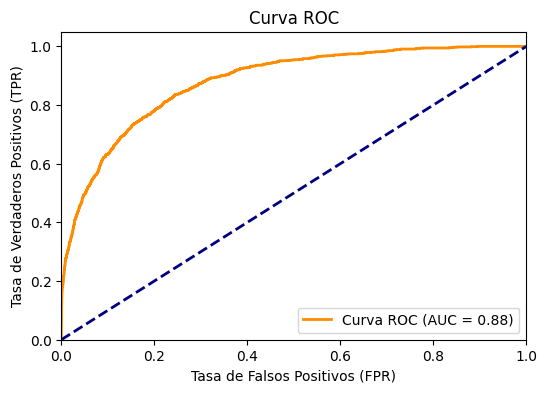

In [ ]:
ROC_AUC(X_test_scaled, y_test)

In [ ]:
# Calculamos el umbral óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Umbral óptimo:", optimal_threshold)

### Esto es una ayuda no la respuestas

Exactitud (Accuracy): 0.8628

Interpretación: El modelo predice correctamente el 86.28% de las instancias en el conjunto de datos. Aunque la exactitud es una métrica común, puede ser engañosa si hay un desbalance significativo entre las clases.
Precisión (Precision): 0.7152

Interpretación: De todas las instancias que el modelo clasificó como "True", el 71.52% son realmente "True". Esto indica que el modelo tiene un buen desempeño en minimizar los falsos positivos.
Sensibilidad (Recall): 0.4887

Interpretación: El modelo identifica correctamente el 48.87% de las instancias "True". Este es un valor relativamente bajo, lo que sugiere que el modelo tiene dificultades para detectar los verdaderos positivos, lo que podría ser problemático si la clase "True" es de interés (por ejemplo, en problemas de detección de fraudes o enfermedades).
F1 Score: 0.5806

Interpretación: El F1 Score es la media armónica entre la precisión y el recall. Un F1 Score de 0.5806 indica un balance entre precisión y recall, pero sugiere que el modelo no está funcionando óptimamente en la identificación de la clase positiva ("True").
Reporte de Clasificación
Clase "False":
Precisión: 0.89 (alta)
Recall: 0.95 (muy alta)
F1 Score: 0.92 (muy alto)
Soporte: 4582 (número de instancias "False")
Clase "True":
Precisión: 0.72 (buena, pero no tan alta como la clase "False")
Recall: 0.49 (bajo)
F1 Score: 0.58 (bajo)
Soporte: 1105 (número de instancias "True")
Análisis de Falsos Positivos y Falsos Negativos
Falsos Positivos: Instancias que el modelo predice como "True" pero son "False". Con una precisión de 0.7152, hay un 28.48% de los casos que son falsos positivos. Esto puede ser aceptable dependiendo del contexto, pero puede tener un costo si estás identificando algo crítico (ej. fraudes).

Falsos Negativos: Instancias que el modelo predice como "False" pero son "True". Con un recall de 0.4887, esto significa que más de la mitad de las instancias "True" no están siendo detectadas por el modelo, lo cual es una preocupación significativa, especialmente en problemas donde detectar la clase positiva es crucial.

Conclusiones y Recomendaciones
Desbalance de Clases: Dado que hay una cantidad significativamente mayor de instancias "False" en comparación con "True", podrías estar enfrentando un problema de desbalance de clases. Esto podría justificar la baja sensibilidad.

Ajuste del Modelo: Considera ajustar el umbral de decisión del modelo, usar técnicas de sobremuestreo (como SMOTE) para las instancias "True", o probar otros modelos que puedan manejar mejor el desbalance.

Más Métricas: También sería útil considerar la curva ROC y el AUC (Área bajo la curva) para evaluar mejor la capacidad del modelo para discriminar entre las clases.

Mejoras en el Preprocesamiento: Examina si hay características adicionales que puedan ayudar al modelo o si puedes mejorar la calidad de los datos, por ejemplo, imputando correctamente valores faltantes o eliminando outliers.

Validación Cruzada: Realiza una validación cruzada para asegurarte de que los resultados sean robustos y no simplemente un artefacto del conjunto de datos específico utilizado.

En resumen, aunque tu modelo tiene un rendimiento decente en términos de exactitud y precisión, su capacidad para identificar correctamente los verdaderos positivos es baja. Te recomendaría investigar y experimentar con algunas de las estrategias mencionadas para mejorar su desempeño.

#Parte 3

In [ ]:
y_pred_random = np.random.randint(2, size=len(list(y_test)))

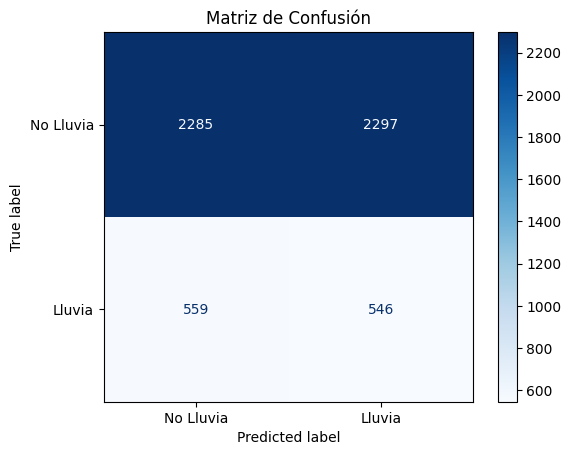

Balanced Accuracy: 0.4964
Especificidad (Specificity): 0.4987
Exactitud (Accuracy): 0.4978
Precisión (Precision): 0.1921
Sensibilidad (Recall): 0.4941
F1 Score: 0.2766
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.80      0.50      0.62      4582
        True       0.19      0.49      0.28      1105

    accuracy                           0.50      5687
   macro avg       0.50      0.50      0.45      5687
weighted avg       0.68      0.50      0.55      5687



In [ ]:
metricas(y_test, y_pred_random)

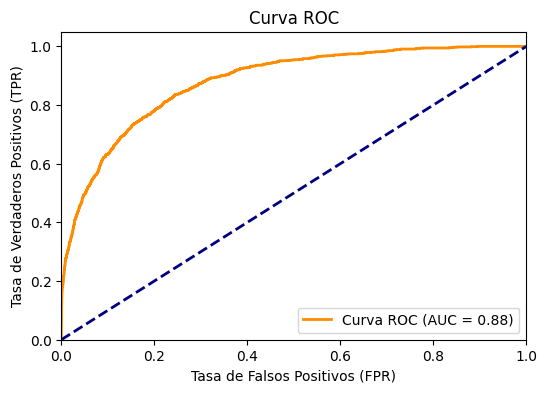

In [ ]:
ROC_AUC(X_test_scaled, y_test)


In [ ]:
# Calculamos el umbral óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Umbral óptimo:", optimal_threshold)


Umbral óptimo: 0.16285732072192832
